#### 基于机器学习的HPC抗压强度预测

In [ ]:
# 数据来源
# https://www.kaggle.com/datasets/sinamhd9/concrete-comprehensive-strength

<!-- <h1 style="font-size:24px; font-family:calibri; color:#222C47;"><b>🔑 Key Components:</b></h1> -->

➡️ **Cement (kg/m^3):**
    水泥：The amount of cement in the concrete mixture.
    
➡️ **Blast Furnace Slag (kg/m^3):** 
    高炉矿渣：The amount of blast furnace slag in the concrete mixture.
    
➡️ **Fly Ash (kg/m^3):** 
    粉煤灰：The amount of fly ash in the concrete mixture.
    
➡️ **Water (kg/m^3):** 
    水：The amount of water in the concrete mixture.
    
➡️ **Superplasticizer (kg/m^3):**
    减水剂：The amount of superplasticizer in the concrete mixture.
    
➡️ **Coarse Aggregate (kg/m^3):** 
    粗骨料：The amount of coarse aggregate in the concrete mixture.
    
➡️ **Fine Aggregate (kg/m^3):** 
    细骨料：The amount of fine aggregate in the concrete mixture.
    
➡️ **Age (days):** 
    养护期：The curing age of the concrete (in days).
    
➡️ **Compressive Strength (MPa):** 
    抗压强度：The target variable representing the concrete's compressive strength.

In [3]:
# Import necessary imports.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
df = pd.read_csv('../input/concrete-compressive-strength/Concrete Compressive Strength.csv')

In [3]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


##### <a id="datapreprocessing"></a>
# <p style="background-color: #DC714E; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">3. Data Cleaning and Preprocessing</p>
⬆️ [Tabel of Contents](#contents_tabel)

In [4]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),Concrete compressive strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Cement                          1030 non-null   float64
 1   Blast Furnace Slag              1030 non-null   float64
 2   Fly Ash                         1030 non-null   float64
 3   Water                           1030 non-null   float64
 4   Superplasticizer                1030 non-null   float64
 5   Coarse Aggregate                1030 non-null   float64
 6   Fine Aggregate                  1030 non-null   float64
 7   Age (day)                       1030 non-null   int64  
 8   Concrete compressive strength   1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


<a id="missing_values"></a>
# <b><span style='color:#5D9299'>3.1 |</span><span style='color:#DC714E'> Checking for Missing Values</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

**Looks like there are no missing values in the data, let's check missing values**

In [6]:
df.isna().sum()

Cement                            0
Blast Furnace Slag                0
Fly Ash                           0
Water                             0
Superplasticizer                  0
Coarse Aggregate                  0
Fine Aggregate                    0
Age (day)                         0
Concrete compressive strength     0
dtype: int64

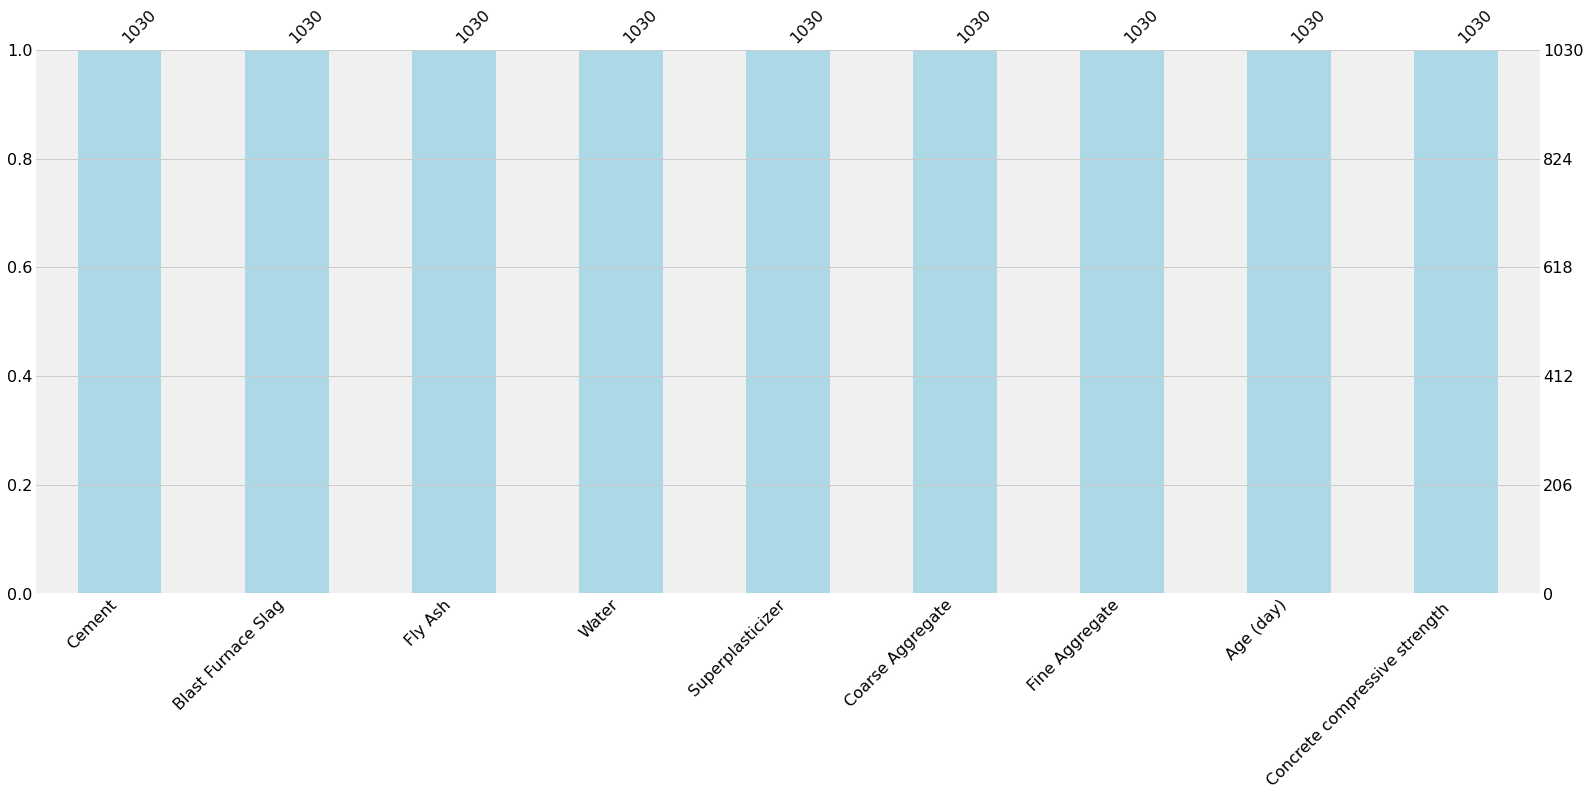

In [7]:
# visualizing missing values

msno.bar(df, color = "lightblue")
plt.show()

<a id="outliers"></a>
# <b><span style='color:#5D9299'>3.2 |</span><span style='color:#DC714E'> Outliers Detection</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

In [8]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


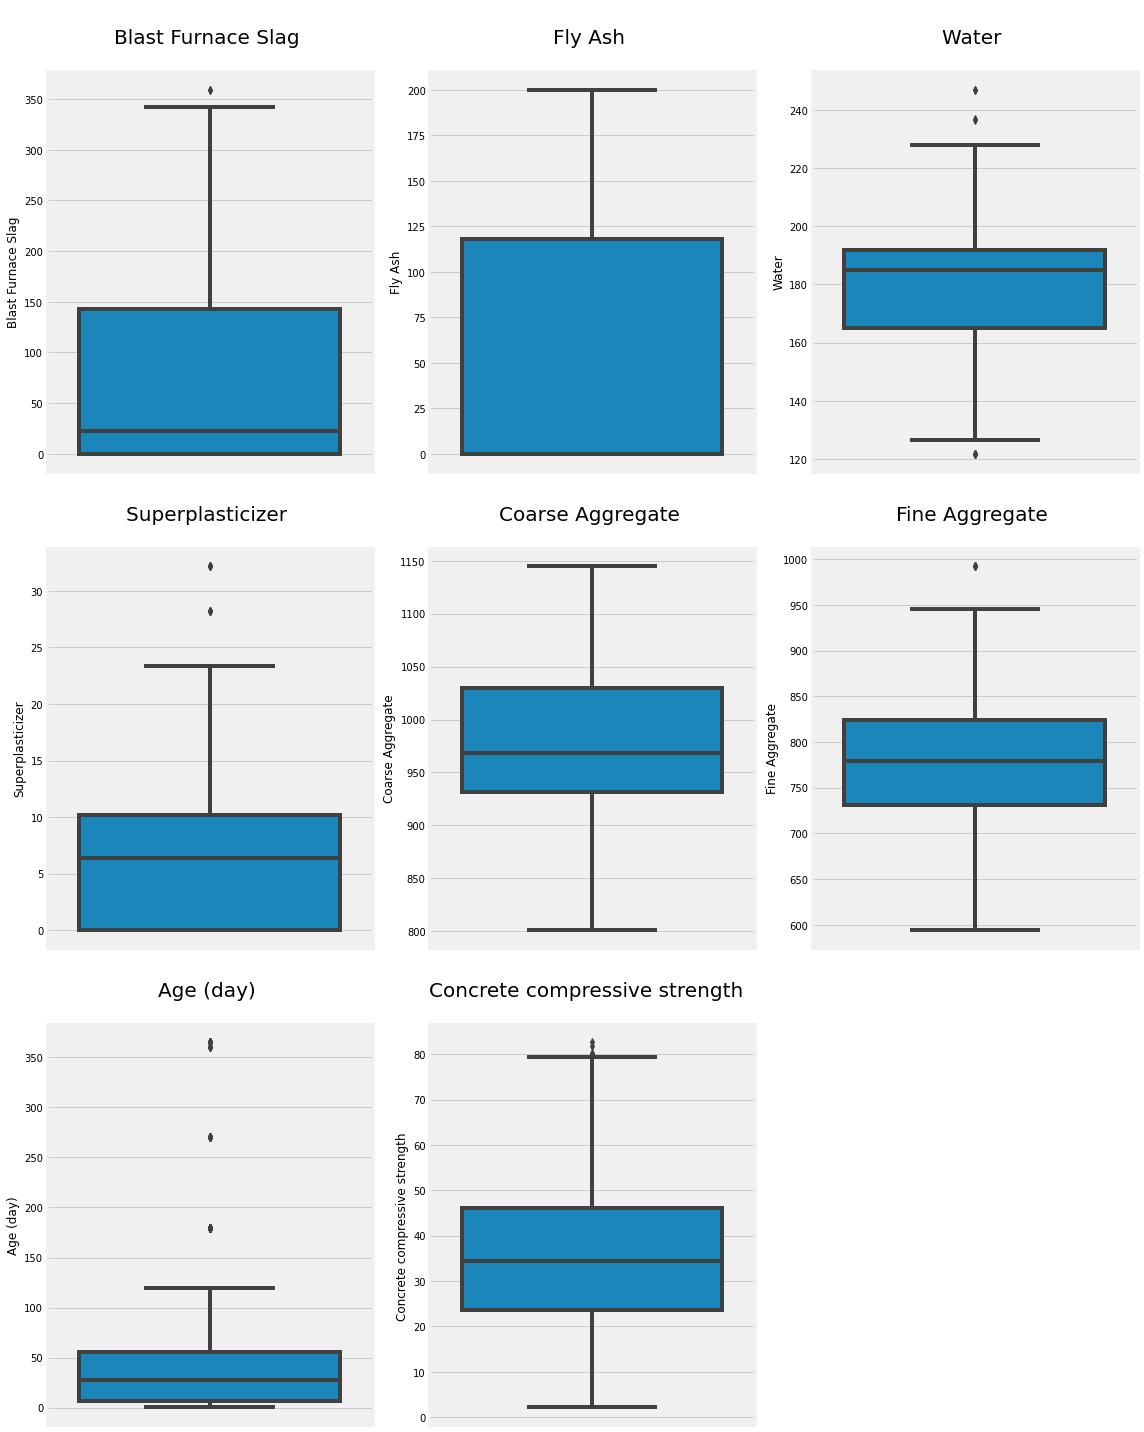

In [9]:
cols = df.columns

plt.figure(figsize = (16, 20))
plotnumber = 1

for i in range(1, len(cols)):
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.boxplot(y = cols[i], data = df, ax = ax)
        plt.title(f"\n{cols[i]} \n", fontsize = 20)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

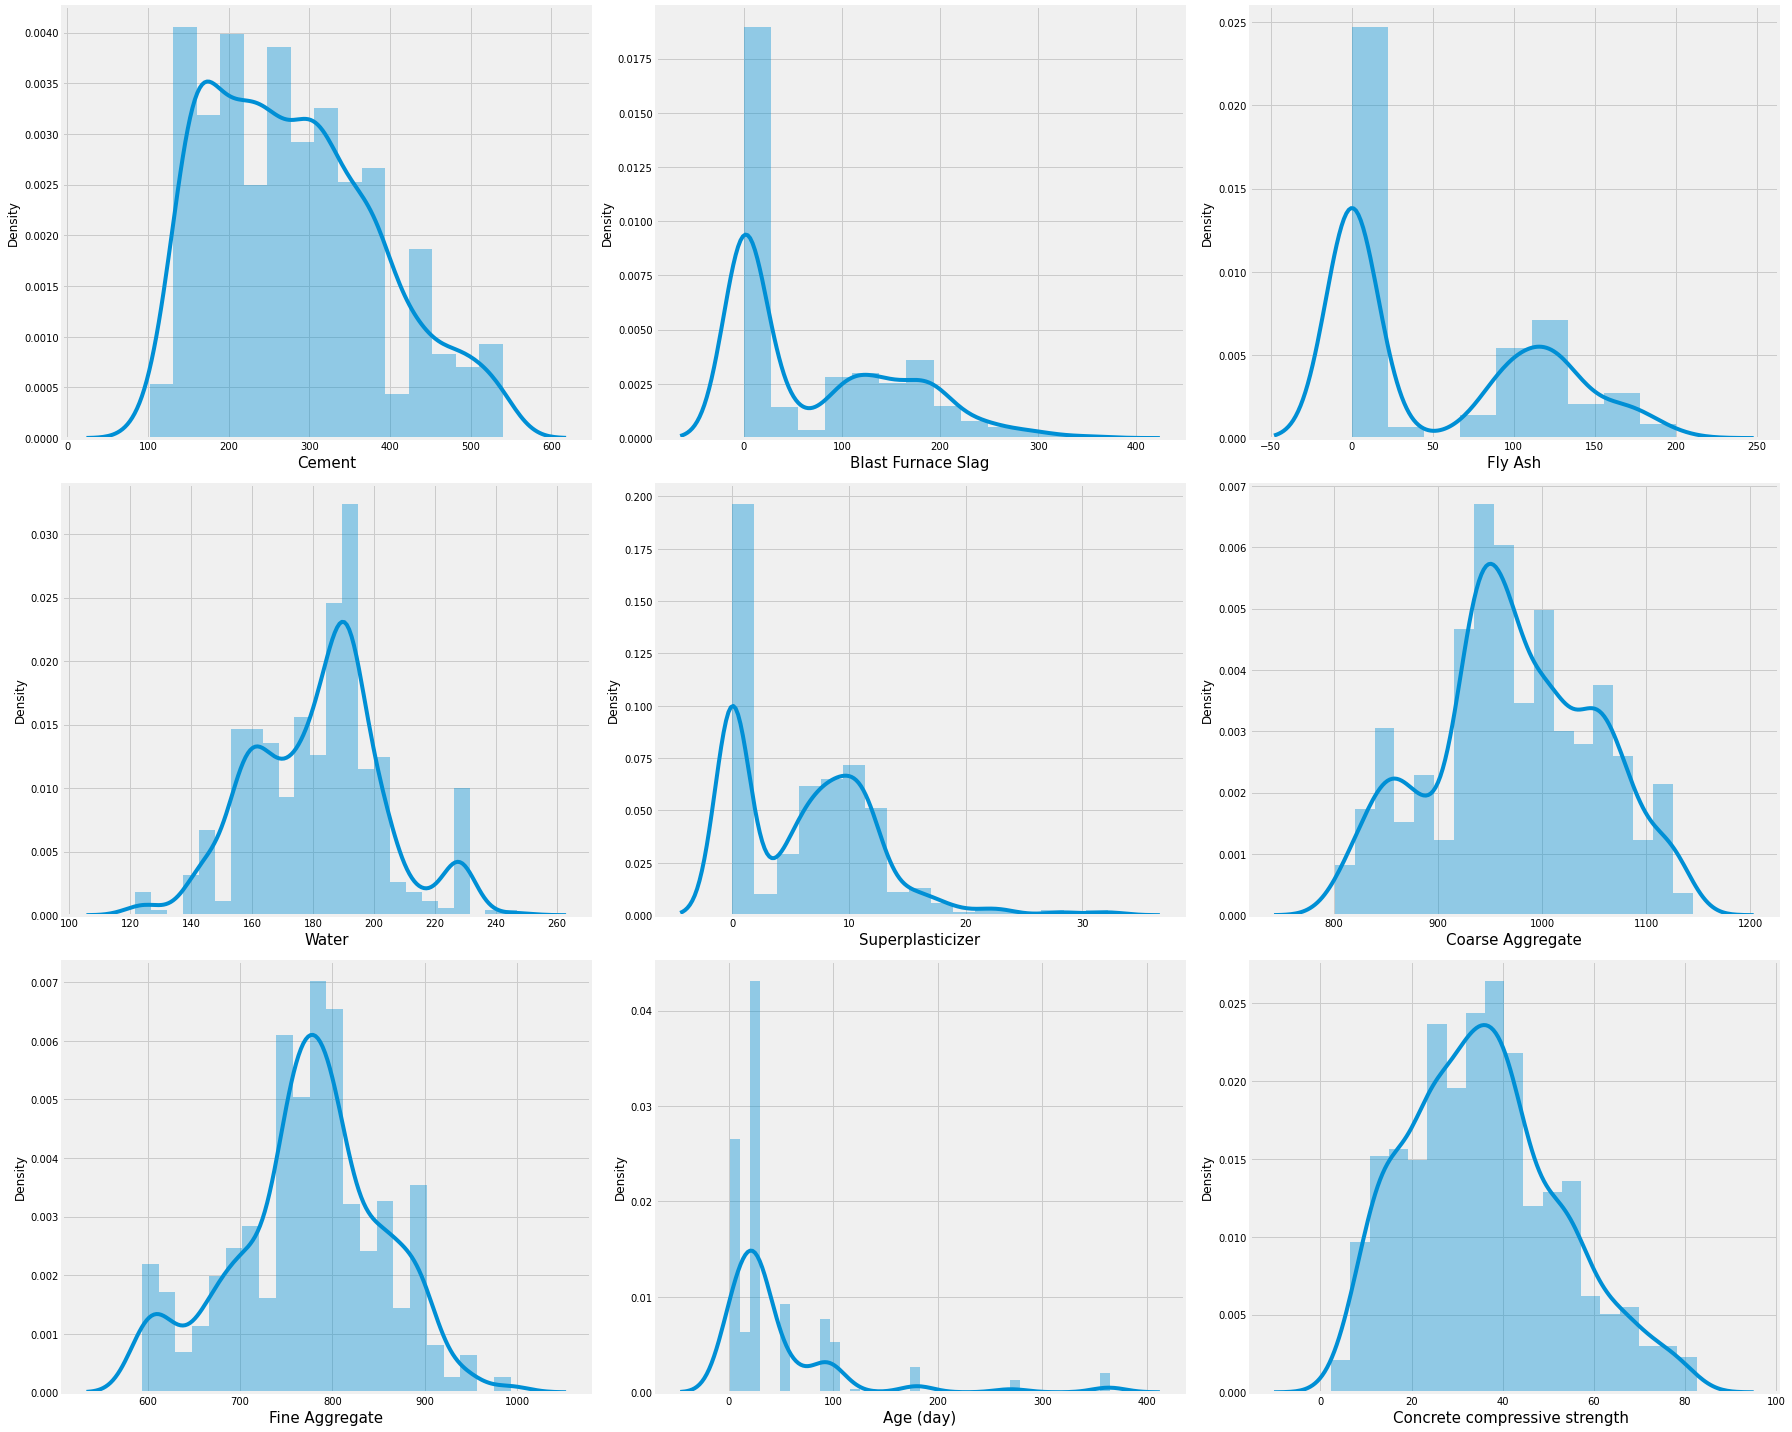

In [10]:
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in df.columns:
    if plotnumber <= 9: 
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

<p style = "font-size : 18px; color : #34656d ; font-family : 'Comic Sans MS'; ">I can see som outliers are present in <strong>water</strong>, <strong>Superplasticizer</strong> and <strong>Age</strong> columns, I will handle these outliers later in feature engineering part</p>

##### <a id="eda"></a>
# <p style="background-color: #DC714E; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">4. Exploratory Data Analysis (EDA)</p>
⬆️ [Tabel of Contents](#contents_tabel)

<a id="correlation"></a>
# <b><span style='color:#5D9299'>4.1 |</span><span style='color:#DC714E'> Correlation Analysis</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

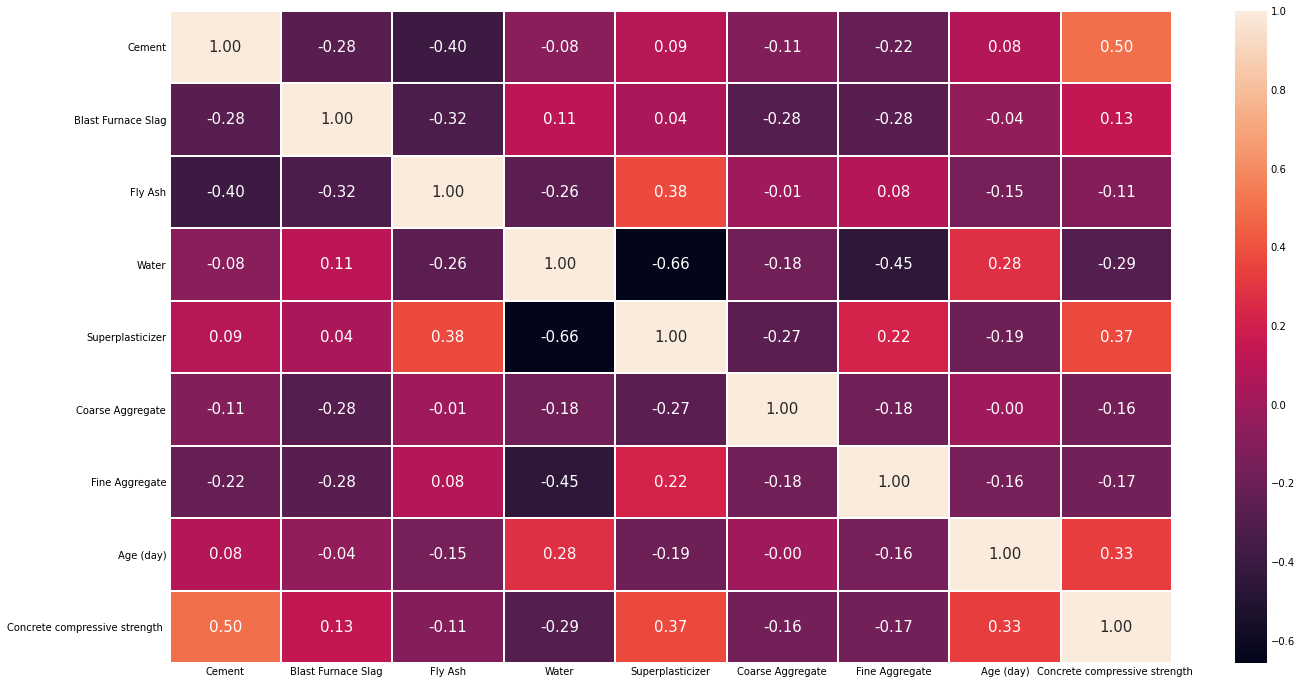

In [11]:
plt.figure(figsize = (20, 12))
sns.heatmap(df.corr(), annot = True, fmt = '0.2f', annot_kws = {'size' : 15}, linewidth = 2, linecolor = 'white')
plt.show()

<p style = "font-size : 20px; color : #34656d ; font-family : 'Comic Sans MS';"><strong>Insights from Correlation Matrix :</strong></p>

<ul>
    <li style = "font-size : 18px; color : #34656d ; font-family : 'Comic Sans MS'; "><strong>Cement and Concrete Compressive Strength: </strong>The correlation is 0.50, which is a moderate positive correlation. This indicates that as the amount of cement increases, the compressive strength of the concrete tends to increase as well.</li>
    <li style = "font-size : 18px; color : #34656d ; font-family : 'Comic Sans MS'; "><strong>Water and Superplasticizer: </strong>There is a strong negative correlation of -0.66. This suggests that the more superplasticizer used, the less water is needed. Superplasticizers are used to enhance the workability of concrete, allowing for a reduction in water content without reducing fluidity.</li>
    <li style = "font-size : 18px; color : #34656d ; font-family : 'Comic Sans MS'; "><strong>Fly Ash and Superplasticizer: </strong>These have a correlation of 0.38, a moderate positive correlation, implying that fly ash and superplasticizer quantities tend to increase together. Fly ash can improve workability and reduce water content, which might be why it's used in conjunction with superplasticizers.</li>
    <li style = "font-size : 18px; color : #34656d ; font-family : 'Comic Sans MS'; "><strong>Fine Aggregate and Water: </strong>This pair has a correlation of -0.45, indicating a moderate negative correlation. It implies that an increase in the amount of fine aggregate may be associated with a decrease in water content.</li>
    <li style = "font-size : 18px; color : #34656d ; font-family : 'Comic Sans MS'; "><strong>Age and Concrete Compressive Strength: </strong> With a correlation of 0.33, it indicates a positive relationship, albeit not very strong, suggesting that as the concrete ages, its compressive strength tends to increase, which is expected as concrete gains strength over time.</li>
    <li style = "font-size : 18px; color : #34656d ; font-family : 'Comic Sans MS'; "><strong>Blast Furnace Slag and Fly Ash:</strong>  There's a negative correlation of -0.32, which could indicate that in mixtures where blast furnace slag is used, less fly ash is present, and vice versa.</li>
    <li style = "font-size : 18px; color : #34656d ; font-family : 'Comic Sans MS'; "><strong>Water and Cement: </strong> The correlation is -0.08, which is a very weak negative correlation, suggesting that there is no significant relationship between the amounts of water and cement used in the concrete mix.</li>   
</ul>

<a id="pair_plot"></a>
# <b><span style='color:#5D9299'>4.2 |</span><span style='color:#DC714E'> Pair Plot</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

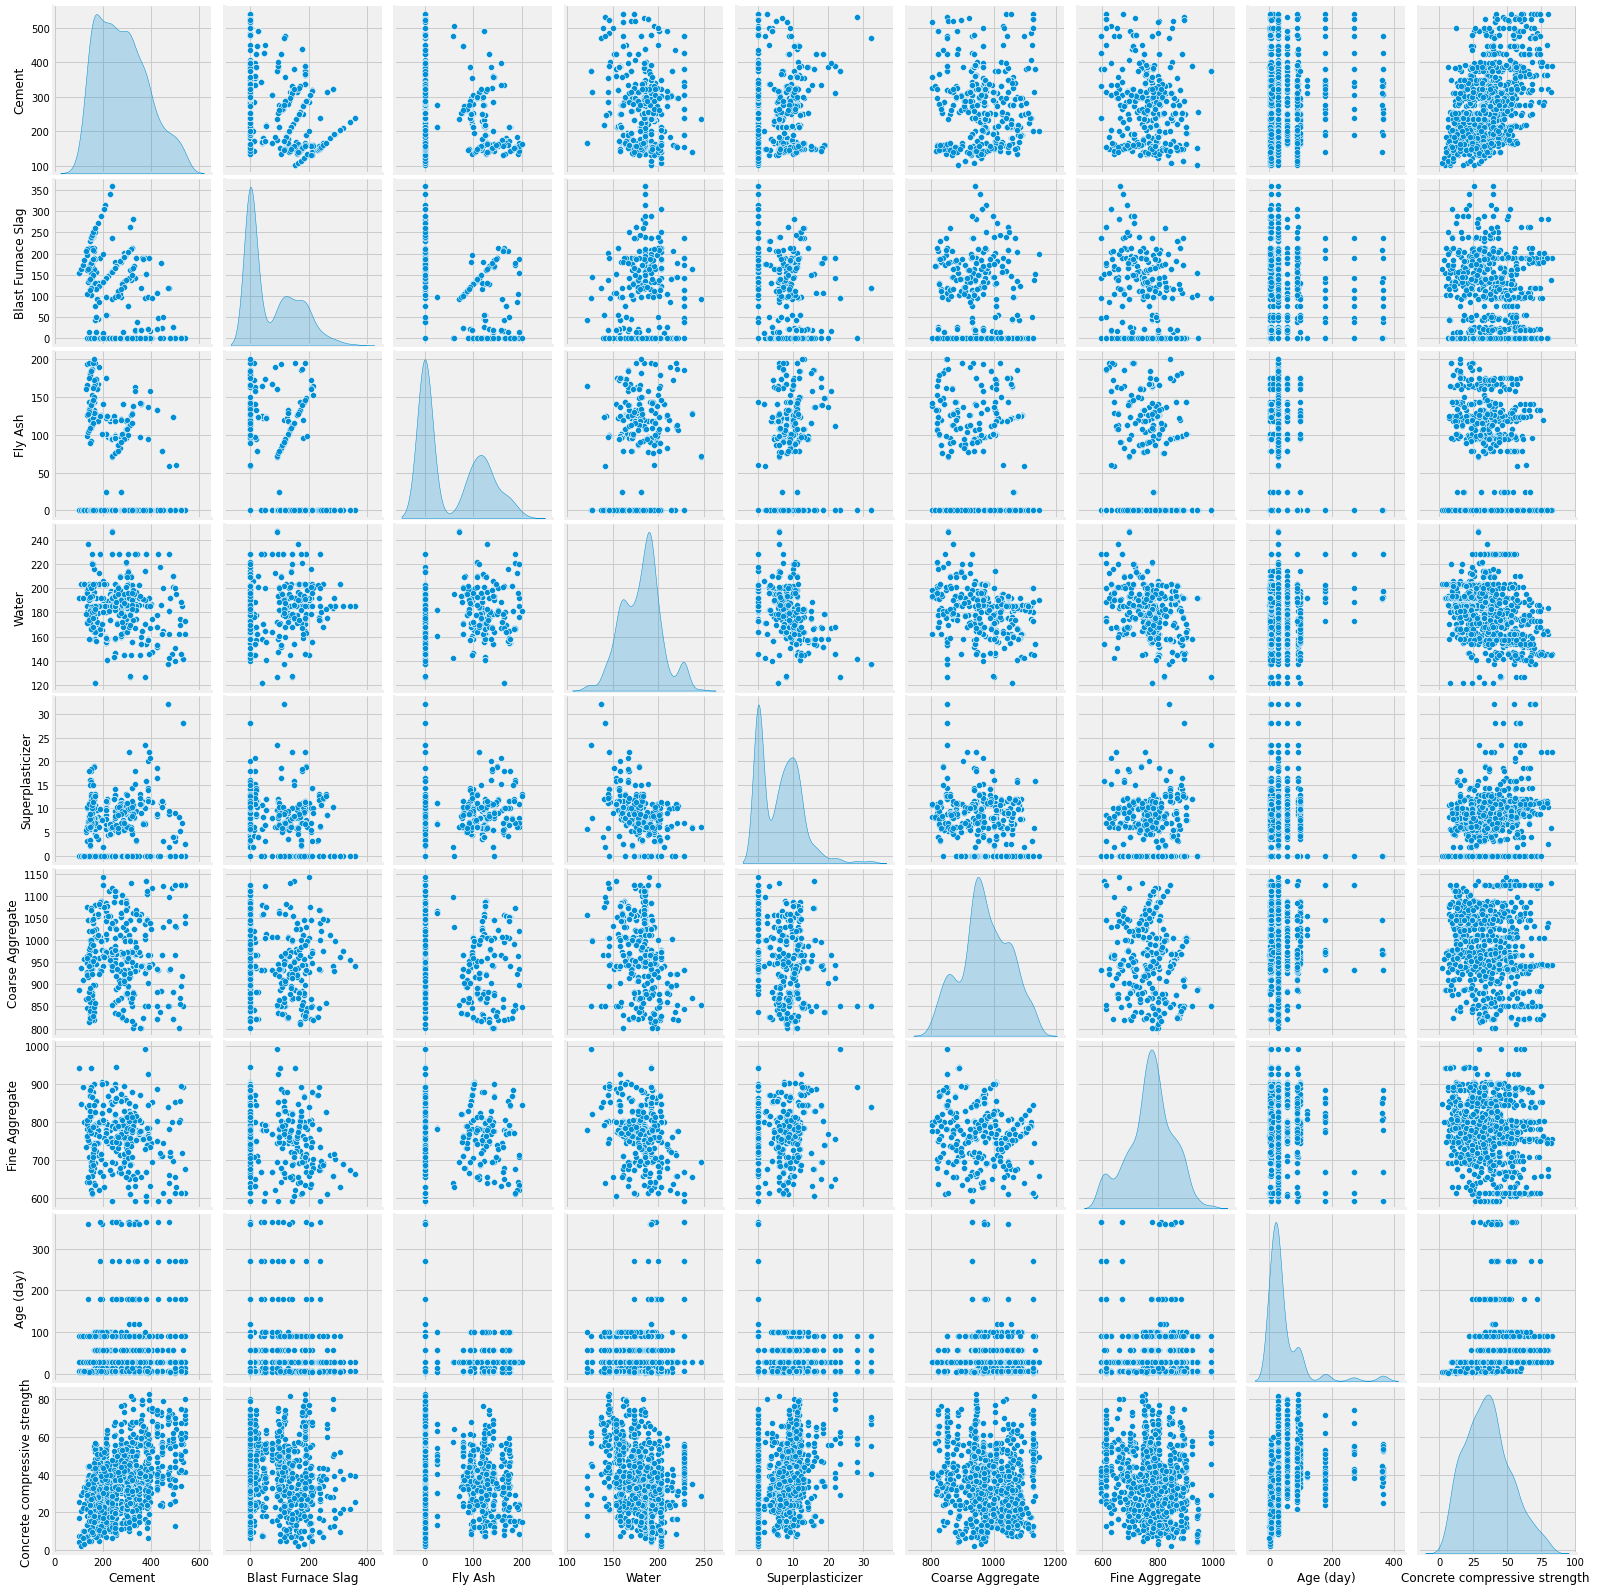

<Figure size 432x288 with 0 Axes>

In [12]:
# Pair Plot
sns.pairplot(df, diag_kind='kde')
plt.show()
plt.savefig('pairplot.png')

<p style = "font-size : 20px; color : #34656d ; font-family : 'Comic Sans MS';"><strong>This pairplot provides a comprehensive visualization of the relationship between each pair of variables in the dataset. Here's an analysis of the insights that I have derived from this plot:</strong></p>

<ol>
    <li style = "font-size : 18px; color : #34656d ; font-family : 'Comic Sans MS'; "><strong>Distribution of Individual Variables:</strong>
        <ul>
            <li>The histograms along the diagonal show the distribution of single 
                variables </li>
            <li>Cement, blast furnace slag, and fly ash display a somewhat right-skewed  distribution, indicating a concentration of lower values with some higher outliers.</li>
            <li>Water, superplasticizer, and age show a near-normal or uniform distribution.
            </li>
            <li>Coarse aggregate and fine aggregate are left-skewed, with higher frequencies of larger quantities. </li>
            <li>Concrete compressive strength appears normally distributed, which is ideal for many statistical analysis methods that assume normality.</li>
        </ul>
    <li style = "font-size : 18px; color : #34656d ; font-family : 'Comic Sans MS'; "><strong>Pairwise Relationships:</strong>
        <ul>
            <li>The scatter plots off the diagonal show the relationships between pairs of variables.</li>
            <li>There are some variables that show a pattern suggesting a correlation, like cement and concrete compressive strength, where an increase in cement seems to be associated with higher compressive strength.</li>
            <li>Age and compressive strength show a non-linear pattern where strength increases with age up to a certain point before leveling off, which is consistent with the curing process of concrete.</li>
            <li>The negative relationship between water and superplasticizer is also visible, supporting the idea that superplasticizers are effective in reducing water content while maintaining workability.</li>
            <li>Some variables show no discernible pattern or relationship, like coarse aggregate with many other components, indicating a lack of correlation.</li>
        </ul>
    <li style = "font-size : 18px; color : #34656d ; font-family : 'Comic Sans MS'; "><strong>Data Density: </strong>
    <ul>
            <li>The density of points within scatter plots varies, with some areas being more densely populated. This indicates the commonality of certain mix proportions in the dataset.</li>
        </ul>    
    </li>
</ol>

##### <a id="feature_engineering"></a>
# <p style="background-color: #DC714E; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">5. Feature Engineering</p>
⬆️ [Tabel of Contents](#contents_tabel)

<a id="feature_and_label"></a>
# <b><span style='color:#5D9299'>5.1 |</span><span style='color:#DC714E'> Creating Features and Label</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

In [13]:
# creating feature and label

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [14]:
X.var()

Cement                10921.742654
Blast Furnace Slag     7444.083725
Fly Ash                4095.548093
Water                   456.060245
Superplasticizer         35.682602
Coarse Aggregate       6045.656228
Fine Aggregate         6428.099159
Age (day)              3990.437729
dtype: float64

<a id="normalization"></a>
# <b><span style='color:#5D9299'>5.2 |</span><span style='color:#DC714E'> Normalizing Features</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

In [15]:
# normalizing features
# let's add 1 to each value in everycolumn so that we don't get exception while calculating the log value of 0

for column in X.columns:
    X[column] += 1
    X[column] = np.log(X[column])

In [16]:
X.var()

Cement                0.143939
Blast Furnace Slag    5.816392
Fly Ash               5.641045
Water                 0.014066
Superplasticizer      1.333888
Coarse Aggregate      0.006475
Fine Aggregate        0.011292
Age (day)             1.233057
dtype: float64

<a id="outliers_detection"></a>
# <b><span style='color:#5D9299'>5.3 |</span><span style='color:#DC714E'> Checking for outliers</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

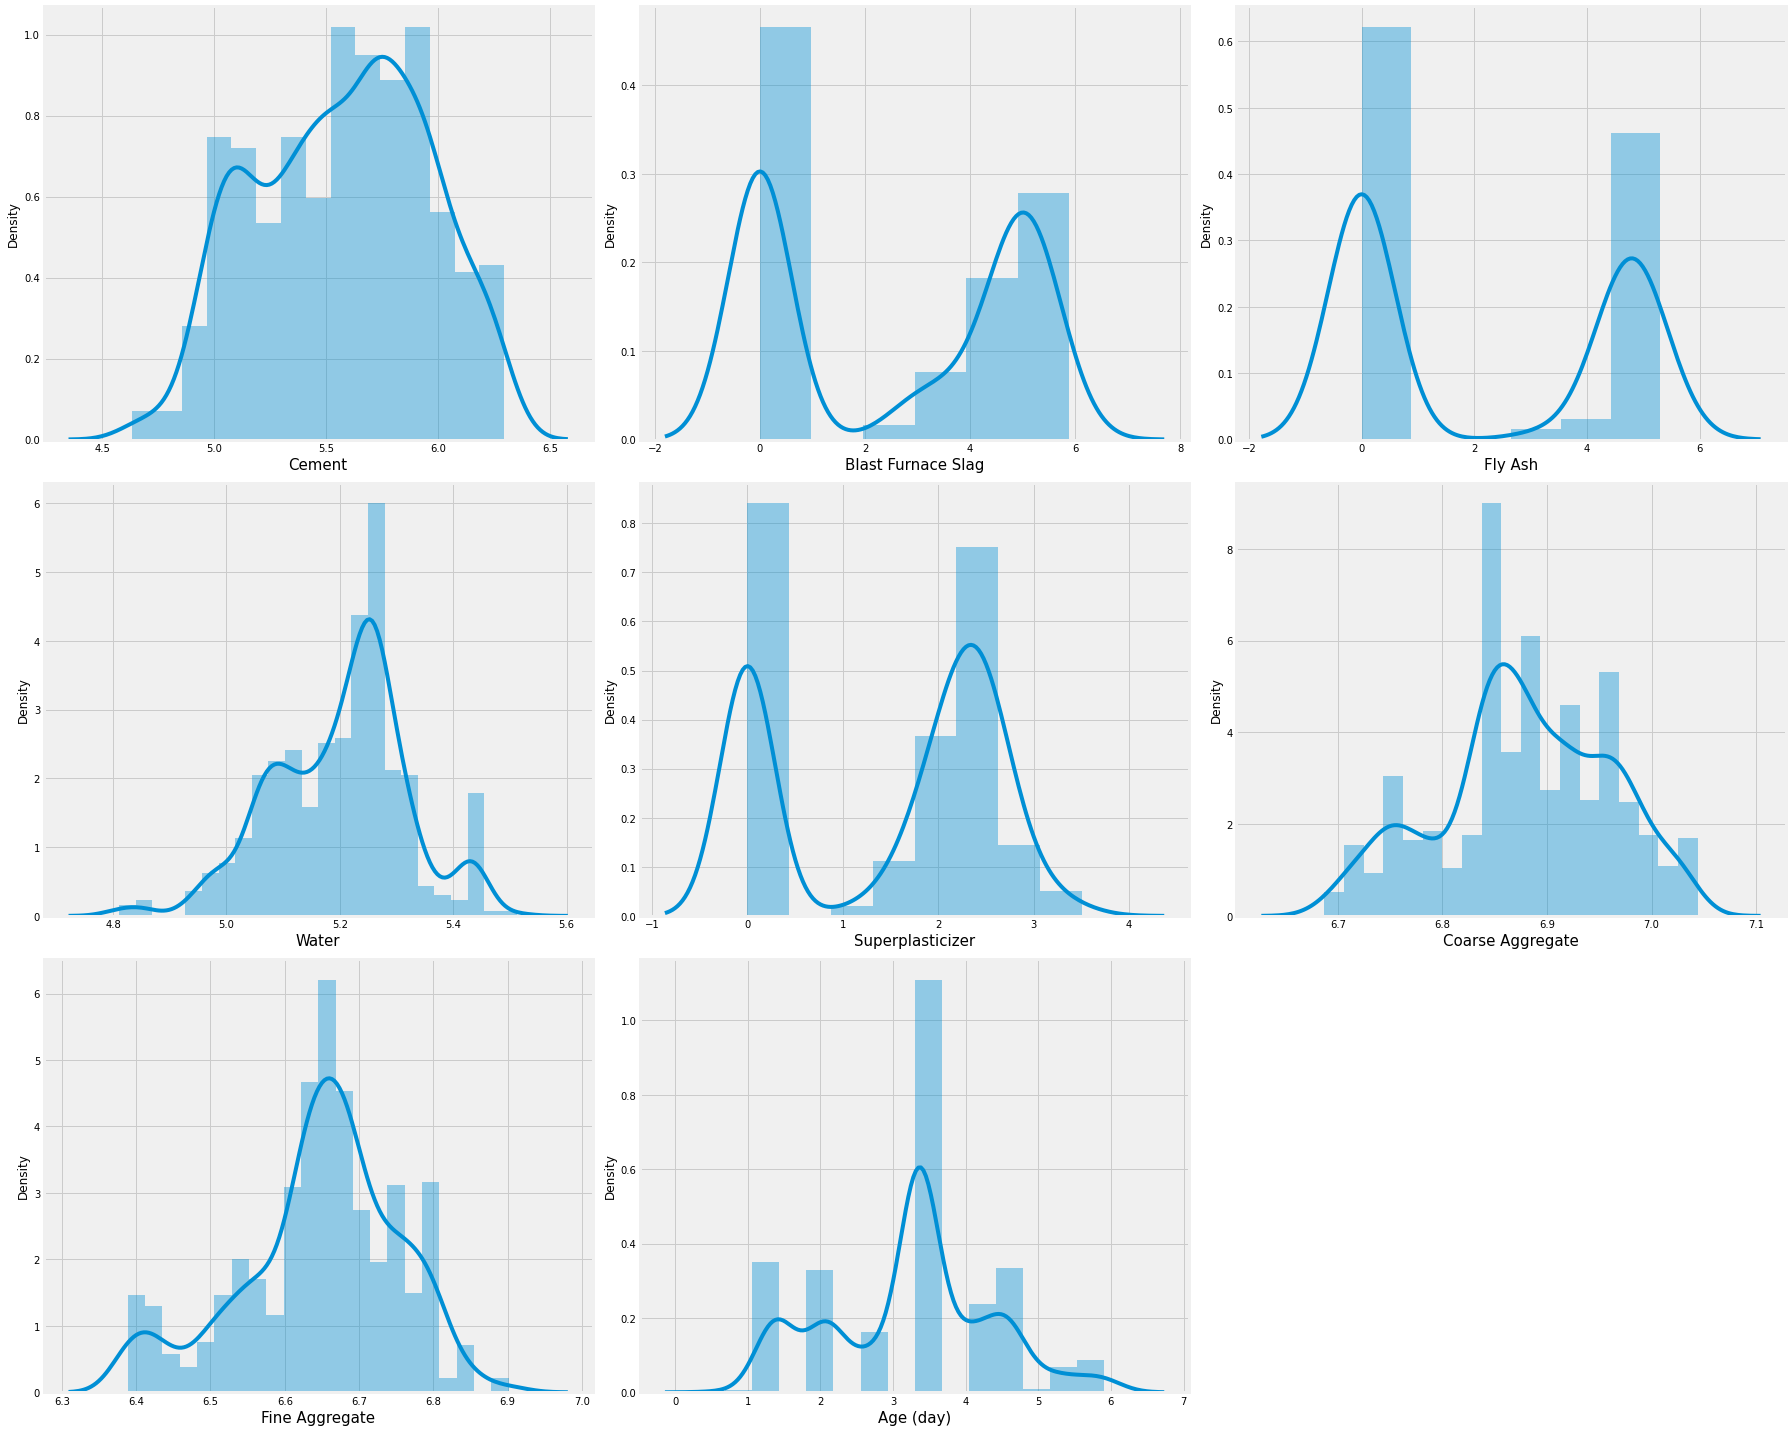

In [17]:
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 8:
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(X[col])
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

<p style = "font-size : 18px; color : #34656d ; font-family : 'Comic Sans MS'; ">Now data is normalized and looks good, let's check for outliers.</p>


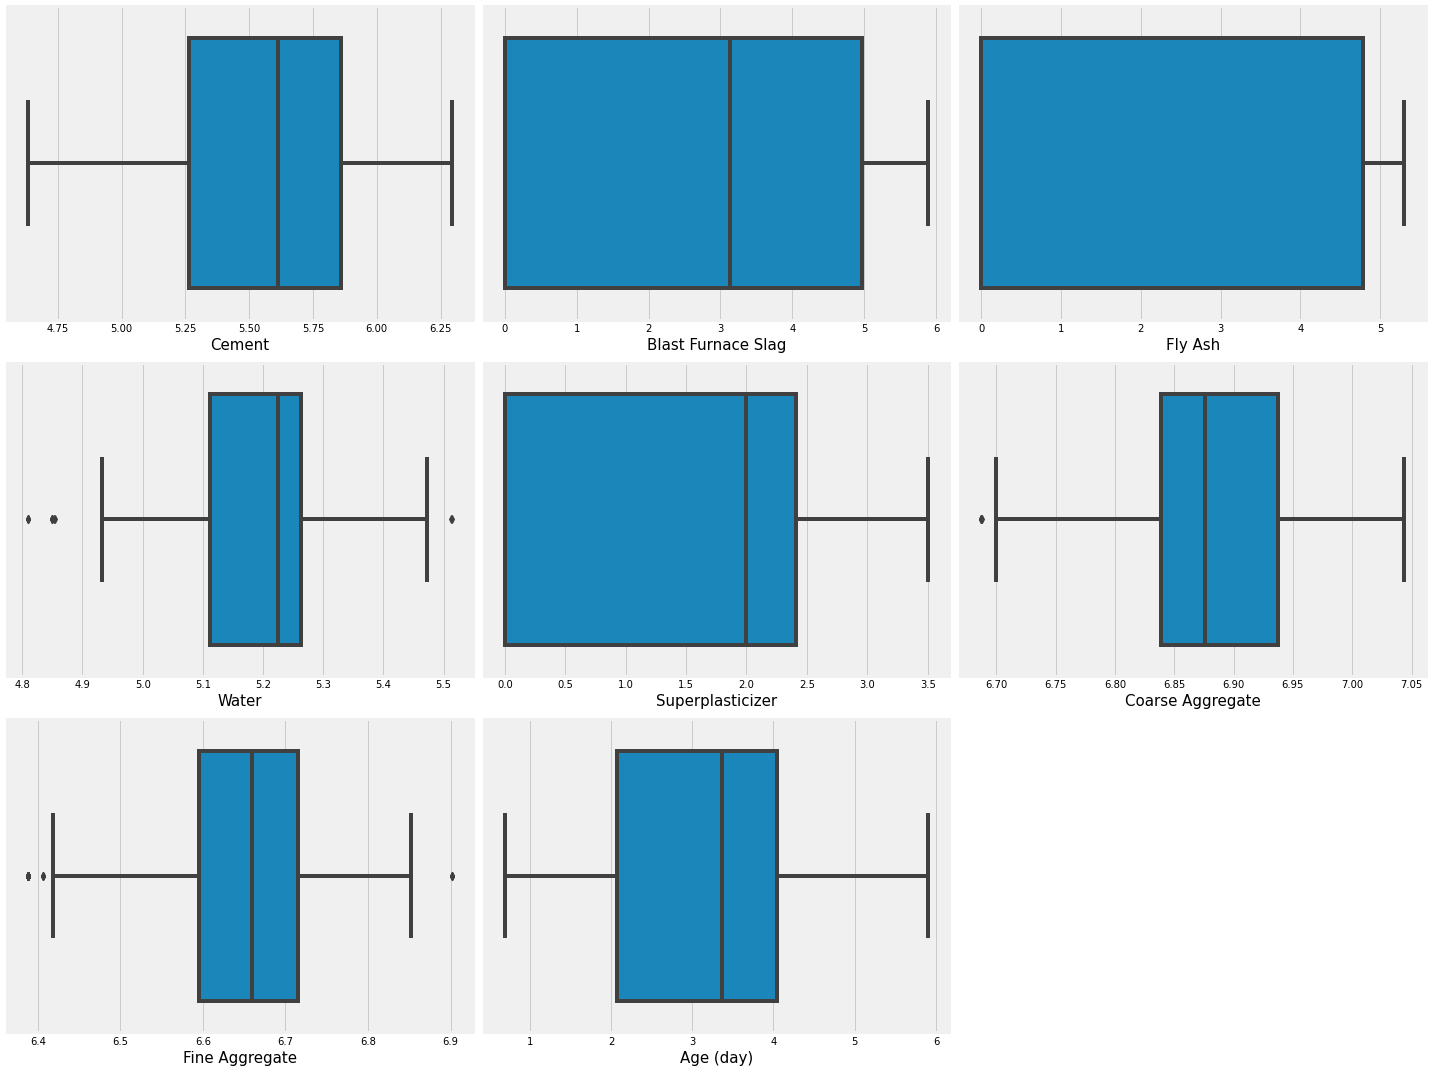

In [18]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 8:
        ax = plt.subplot(3, 3, plotnumber)
        sns.boxplot(X[col])
        plt.xlabel(col, fontsize = 15)
    
    plotnumber += 1
plt.tight_layout()
plt.show()

<p style = "font-size : 18px; color : #34656d ; font-family : 'Comic Sans MS'; ">
Now as we can see there are no more outliers anymore which we have seen earlier</p>


<a id="splitting"></a>
# <b><span style='color:#5D9299'>5.4 |</span><span style='color:#DC714E'> Splitting Dataset into Training and Test Set</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

In [19]:
# splitting data into training and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [20]:
# scaling data

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) 

##### <a id="modelling"></a>
# <p style="background-color: #DC714E; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">6. Modelling</p>
⬆️ [Tabel of Contents](#contents_tabel)

<a id="linear_regression"></a>
# <b><span style='color:#5D9299'>6.1 |</span><span style='color:#DC714E'> Linear Regression</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

In [21]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [22]:
lr.score(X_train, y_train)

0.8072470867586519

In [23]:
lr.score(X_test, y_test)

0.7883365627435878

<a id="lasso_regression"></a>
# <b><span style='color:#5D9299'>6.2 |</span><span style='color:#DC714E'> Lasso Regression</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

In [24]:
from sklearn.linear_model import Lasso, LassoCV

In [25]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 10000, normalize = True)
lassocv.fit(X_train, y_train)

LassoCV(cv=10, max_iter=10000, normalize=True)

In [26]:
lasso = Lasso(alpha = lassocv.alpha_)
lasso.fit(X_train, y_train)

Lasso(alpha=0.0026703085906008488)

In [27]:
lasso.score(X_train, y_train)

0.8072468336224994

In [28]:
lasso.score(X_test, y_test)

0.7883414534719255

<a id="decision_tree"></a>
# <b><span style='color:#5D9299'>6.3 |</span><span style='color:#DC714E'> Decision Tree Regressor</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

In [29]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [30]:
dtr.score(X_train, y_train)

0.9964181155265308

In [31]:
dtr.score(X_test, y_test)

0.8237299084128299

In [32]:
# Hyper Parameter Tuning Decision Tree Regressor

from sklearn.model_selection import GridSearchCV

grid_params = {
    'criterion' : ['mse', 'friedman_mse', 'mae'],
    'splitter' : ['best', 'random'],
    'max_depth' : [3, 5, 7, 9, 10],
    'min_samples_split' : [1, 2, 3, 4, 5],
    'min_samples_leaf' : [1, 2, 3, 4, 5]
}

grid_search = GridSearchCV(dtr, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 750 candidates, totalling 3750 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae'],
                         'max_depth': [3, 5, 7, 9, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [1, 2, 3, 4, 5],
                         'splitter': ['best', 'random']},
             verbose=1)

In [33]:
# best parameters and best score

print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'friedman_mse', 'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 3, 'splitter': 'best'}
0.8084336586042461


In [34]:
dtr = DecisionTreeRegressor(criterion = 'friedman_mse', max_depth = 10, min_samples_leaf = 1, min_samples_split = 2, splitter = 'random')
dtr.fit(X_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=10, splitter='random')

In [35]:
dtr.score(X_train, y_train)

0.9718358862508483

In [36]:
dtr.score(X_test, y_test)

0.8252078372429881

<a id="random_forest_regression"></a>
# <b><span style='color:#5D9299'>6.4 |</span><span style='color:#DC714E'> Random Forest Regression</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

In [37]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [38]:
rfr.score(X_train, y_train)

0.9841895404728339

In [39]:
rfr.score(X_test, y_test)

0.9190957815771958

<a id="ada_boost"></a>
# <b><span style='color:#5D9299'>6.5 |</span><span style='color:#DC714E'> Ada Boost Regression</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

In [40]:
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor(base_estimator = dtr)
ada.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='friedman_mse',
                                                       max_depth=10,
                                                       splitter='random'))

In [41]:
ada.score(X_train, y_train)

0.966573599292328

In [42]:
ada.score(X_test, y_test)

0.8927639477665863

In [43]:
# hyper parameter tuning 

grid_params = {
    'n_estimators' : [40, 50, 80, 100],
    'learning_rate' : [0.01, 0.1, 0.05, 0.5, 1, 10],
    'loss' : ['linear','square', 'exponential']
}

grid_search = GridSearchCV(ada, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5,
             estimator=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='friedman_mse',
                                                                              max_depth=10,
                                                                              splitter='random')),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.05, 0.5, 1, 10],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [40, 50, 80, 100]},
             verbose=1)

In [44]:
# best parameters and best score

print(grid_search.best_params_)
print(grid_search.best_score_)

{'learning_rate': 0.1, 'loss': 'linear', 'n_estimators': 100}
0.8838777814788014


In [45]:
ada = AdaBoostRegressor(base_estimator = dtr, learning_rate = 1, loss = 'exponential', n_estimators = 100)
ada.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='friedman_mse',
                                                       max_depth=10,
                                                       splitter='random'),
                  learning_rate=1, loss='exponential', n_estimators=100)

In [46]:
ada.score(X_train, y_train)

0.917271439236548

In [47]:
ada.score(X_test, y_test)

0.8558479810480724

<a id="gradient_boost_regression"></a>
# <b><span style='color:#5D9299'>6.6 |</span><span style='color:#DC714E'> Gradient Boost Regression</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

In [48]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

GradientBoostingRegressor()

In [49]:
gbr.score(X_train, y_train)

0.9463340322400913

In [50]:
gbr.score(X_test, y_test)

0.913032221832111

In [51]:
# hyper parameter tuning of gradient boost regressor

grid_params = {
    'n_estimators': [90, 100, 120, 180, 200],
    'learning_rate' : [0.01, 0.1, 0.05, 0.5, 1],
    'loss' : ['ls', 'lad', 'huber', 'quantile']
}

grid_search = GridSearchCV(gbr, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.05, 0.5, 1],
                         'loss': ['ls', 'lad', 'huber', 'quantile'],
                         'n_estimators': [90, 100, 120, 180, 200]},
             verbose=1)

In [52]:
# best parameters and best score

print(grid_search.best_params_)
print(grid_search.best_score_)

{'learning_rate': 0.5, 'loss': 'huber', 'n_estimators': 180}
0.9075499192127227


In [53]:
gbr = GradientBoostingRegressor(learning_rate = 0.5, loss = 'ls', n_estimators = 200)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.5, n_estimators=200)

In [54]:
gbr.score(X_train, y_train)

0.9916545835907864

In [55]:
gbr.score(X_test, y_test)

0.9359649606493234

<a id="xgboost_regression"></a>
# <b><span style='color:#5D9299'>6.7 |</span><span style='color:#DC714E'> XGBoost Regression</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

In [56]:
from xgboost import XGBRegressor

xgb = XGBRegressor(booster = 'gbtree', learning_rate = 0.1, max_depth = 7, n_estimators = 200)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [57]:
xgb.score(X_train, y_train)

0.9955577873066723

In [58]:
xgb.score(X_test, y_test)

0.9377174938354055

<a id="voting_regression"></a>
# <b><span style='color:#5D9299'>6.8 |</span><span style='color:#DC714E'> Voting Regression</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

In [59]:
from sklearn.ensemble import VotingRegressor

regressors = [('Linear Regression', lr), ('Lasso Regression', lasso), ('Decision Tree', dtr), ('Random Forest', rfr), ('Ada Boost', ada), ('Gradient Boost', gbr),
              ('XgBoost', xgb)]

vr = VotingRegressor(estimators = regressors, n_jobs = -1, verbose = 1, weights = (0.1, 0.1, 0.1, 0.2, 0.2, 0.7, 0.8))
vr.fit(X_train, y_train)

VotingRegressor(estimators=[('Linear Regression', LinearRegression()),
                            ('Lasso Regression',
                             Lasso(alpha=0.0026703085906008488)),
                            ('Decision Tree',
                             DecisionTreeRegressor(criterion='friedman_mse',
                                                   max_depth=10,
                                                   splitter='random')),
                            ('Random Forest', RandomForestRegressor()),
                            ('Ada Boost',
                             AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='friedman_mse...
                                          interaction_constraints='',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=7, min_child_weight=1,
                                          missing=nan,
                                          monotone

In [60]:
vr.score(X_train, y_train)

0.989255889318805

In [61]:
vr.score(X_test, y_test)

0.9419312719611419

##### <a id="evaluation"></a>
# <p style="background-color: #DC714E; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">7. Model Evaluation</p>
⬆️ [Tabel of Contents](#contents_tabel)

In [62]:
models = pd.DataFrame({
    'Model' : ['Linear Regression', 'Lasso Regression', 'Decision Tree', 'Random Forest', 'Ada Boost', 'Gradient Boost', 'XgBoost', "Voting Regressor"],
    'Score' : [lr.score(X_test, y_test), lasso.score(X_test, y_test), dtr.score(X_test, y_test), rfr.score(X_test, y_test), ada.score(X_test, y_test),
               gbr.score(X_test, y_test), xgb.score(X_test, y_test), vr.score(X_test, y_test)]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
7,Voting Regressor,0.941931
6,XgBoost,0.937717
5,Gradient Boost,0.935965
3,Random Forest,0.919096
4,Ada Boost,0.855848
2,Decision Tree,0.825208
1,Lasso Regression,0.788341
0,Linear Regression,0.788337


In [63]:
px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', title = 'Models Comparison')

<p style = "font-size : 18px; color : #34656d ; font-family : 'Comic Sans MS'; ">Great we get accuracy above <strong>90%</strong> which is quite good.</p>

<p style = "font-size : 20px; color : #34656d ; font-family : 'Comic Sans MS'; "><strong>If you like this kernel, Please do upvote</strong></p>

<p style = "font-size : 18px; color : #34656d ; font-family : 'Comic Sans MS'; "><strong>Reference: </strong>
I've adopted the styling cues from @dankok notebooks as a reference.</p>